In [1]:
import pandas as pd
import numpy as np

In [2]:
filename = 'shopee.csv'
exportname = 'shopee_trans.csv'

In [3]:
df = pd.read_csv(filename).T
df_month = pd.DataFrame(df[5:][0])
df_month.columns = ['Visit']
df_month.head()

,Visit
2016-12,80559
2017-01,80559
2017-02,80559
2017-03,86791
2017-04,84268


In [4]:
df_use = df_month
df_use.index = pd.to_datetime(df_use.index, format='%Y-%m')
df_use.head()

,Visit
2016-12-01,80559
2017-01-01,80559
2017-02-01,80559
2017-03-01,86791
2017-04-01,84268


In [5]:
df_use['Visit per day'] = df_use['Visit'] / df_use.index.days_in_month
df_use.head()

,Visit,Visit per day
2016-12-01,80559,2598.677419
2017-01-01,80559,2598.677419
2017-02-01,80559,2877.107143
2017-03-01,86791,2799.709677
2017-04-01,84268,2808.933333


In [6]:
df_use.loc[pd.Timestamp("2021-10-01"), 'Visit'] = 0
df_use.head()

,Visit,Visit per day
2016-12-01,80559,2598.677419
2017-01-01,80559,2598.677419
2017-02-01,80559,2877.107143
2017-03-01,86791,2799.709677
2017-04-01,84268,2808.933333


In [7]:
df_use.index

DatetimeIndex(['2016-12-01', '2017-01-01', '2017-02-01', '2017-03-01',
               '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01',
               '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01',
               '2017-12-01', '2018-01-01', '2018-02-01', '2018-03-01',
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01', '2019-02-01', '2019-03-01',
               '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01',
               '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01',
               '2019-12-01', '2020-01-01', '2020-02-01', '2020-03-01',
               '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01',
               '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01',
               '2020-12-01', '2021-01-01', '2021-02-01', '2021-03-01',
               '2021-04-01', '2021-05-01', '2021-06-01', '2021-07-01',
      

In [8]:
df_use = df_use.resample('D', convention='end').asfreq()
df_use

,Visit,Visit per day
2016-12-01,80559,2598.677419
2016-12-02,NaN,NaN
2016-12-03,NaN,NaN
2016-12-04,NaN,NaN
2016-12-05,NaN,NaN
...,...,...
2021-09-27,NaN,NaN
2021-09-28,NaN,NaN
2021-09-29,NaN,NaN
2021-09-30,NaN,NaN


In [9]:
df_use['Visit'] = df_use['Visit'].astype(float)
df_use['Visit per day'] = df_use['Visit per day'].astype(float)
df_use.describe()

,Visit,Visit per day
count,5.900000e+01,5.800000e+01
mean,1.091288e+07,3.650210e+05
std,1.280995e+07,4.224214e+05
min,0.000000e+00,2.598677e+03
25%,1.118366e+06,3.879131e+04
50%,3.543966e+06,1.211920e+05
75%,2.550426e+07,8.558087e+05
max,3.604460e+07,1.201487e+06


In [10]:
df_inter_time = df_use.interpolate(method='time')
df_inter_time

,Visit,Visit per day
2016-12-01,80559.0,2.598677e+03
2016-12-02,80559.0,2.598677e+03
2016-12-03,80559.0,2.598677e+03
2016-12-04,80559.0,2.598677e+03
2016-12-05,80559.0,2.598677e+03
...,...,...
2021-09-27,4616737.2,1.154184e+06
2021-09-28,3462552.9,1.154184e+06
2021-09-29,2308368.6,1.154184e+06
2021-09-30,1154184.3,1.154184e+06


<AxesSubplot:>

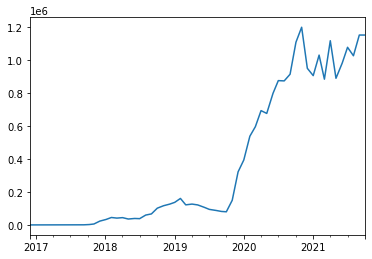

In [11]:
df_inter_time['Visit per day'].plot()

In [12]:
day = df_inter_time.index.day
month = df_inter_time.index.month
day_sub = 15 ** 2 - (15 - day) ** 2
day_sub

Int64Index([ 29,  56,  81, 104, 125, 144, 161, 176, 189, 200,
            ...
            176, 161, 144, 125, 104,  81,  56,  29,   0,  29],
           dtype='int64', length=1766)

In [13]:
day_of_week = df_inter_time.index.day_of_week.values

In [14]:
buy_dow = {
    0: 14,
    1: 14,
    2: 15,
    3: 15,
    4: 15,
    5: 13,
    6: 14
}

In [15]:
dow_bonus = np.vectorize(buy_dow.get)(day_of_week)
dow_bonus

array([15, 15, 13, ..., 15, 15, 15])

In [16]:
# Adding noise
noise = 100 + (day_sub / 20) + (month == day) * 15 + (month == day + 1) * 7 + (month == day - 1) * 3 + (np.random.randn(df_use.shape[0]) + 0.5) * dow_bonus * 2
noise

Float64Index([144.68406592377033, 130.23835384678483, 101.88345365786292,
              126.71166640360053,  155.0509221807322, 107.04676365561458,
               86.08138883531335,  163.7698704724298, 166.74374558891975,
              125.03066680856212,
              ...
              147.46560534731162, 160.15666648274131,  83.98577028833338,
               83.80276977009346, 144.13302404476946,  95.26182473914398,
              60.481140015476655, 102.84305161329209, 132.34813832307833,
                85.1359671614461],
             dtype='float64', length=1766)

<AxesSubplot:>

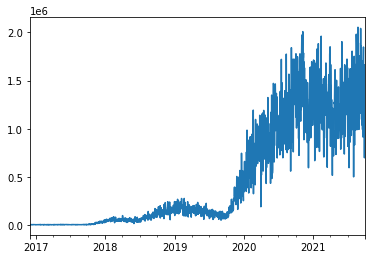

In [17]:
df_noise = df_inter_time['Visit per day'] * noise / 100
df_noise.plot()

In [18]:
df_noise.resample('M').sum()[:-1]

2016-12-31    1.090998e+05
2017-01-31    1.032265e+05
2017-02-28    9.245640e+04
2017-03-31    9.743881e+04
2017-04-30    1.068359e+05
2017-05-31    1.216958e+05
2017-06-30    1.203373e+05
2017-07-31    1.141952e+05
2017-08-31    1.089729e+05
2017-09-30    1.236327e+05
2017-10-31    2.241149e+05
2017-11-30    5.743513e+05
2017-12-31    1.019414e+06
2018-01-31    1.518353e+06
2018-02-28    1.563491e+06
2018-03-31    1.634268e+06
2018-04-30    1.529296e+06
2018-05-31    1.540578e+06
2018-06-30    1.502570e+06
2018-07-31    1.986659e+06
2018-08-31    2.571881e+06
2018-09-30    3.203137e+06
2018-10-31    4.174052e+06
2018-11-30    4.522738e+06
2018-12-31    4.591636e+06
2019-01-31    5.550002e+06
2019-02-28    5.017823e+06
2019-03-31    4.777775e+06
2019-04-30    4.691068e+06
2019-05-31    4.569296e+06
2019-06-30    4.226007e+06
2019-07-31    3.576536e+06
2019-08-31    3.423577e+06
2019-09-30    2.934344e+06
2019-10-31    4.139690e+06
2019-11-30    8.918527e+06
2019-12-31    1.309556e+07
2

In [19]:
df_month['Visit'].astype(float).to_numpy()

array([   80559.,    80559.,    80559.,    86791.,    84268.,    93145.,
          96431.,    90914.,    89978.,    88623.,   122889.,   229134.,
         778813.,  1052495.,  1336555.,  1355522.,  1411203.,  1184238.,
        1257409.,  1257409.,  1925134.,  2079085.,  3212275.,  3543966.,
        3923365.,  4299095.,  4568203.,  3851804.,  3877060.,  3865238.,
        3366691.,  3014369.,  2853478.,  2540620.,  2548624.,  4558840.,
        9985486., 12286062., 15618169., 18447276., 20874283., 21042111.,
       23850149., 27211828., 27158374., 27492462., 34337007., 36044596.,
       29523400., 28151025., 28910534., 27481597., 33593113., 27649275.,
       29331919., 33475655., 31885021., 34625529.,        0.])

In [20]:
df_noise.resample('M').sum().to_numpy()

array([  109099.77534665,   103226.46796365,    92456.40157406,
          97438.81368601,   106835.91958961,   121695.81227635,
         120337.25757183,   114195.15607425,   108972.90055007,
         123632.73456408,   224114.9168206 ,   574351.27171203,
        1019413.53135219,  1518352.83212005,  1563491.30392046,
        1634267.65812185,  1529295.93806863,  1540577.62460598,
        1502569.71961068,  1986658.70801457,  2571880.87691185,
        3203137.41839857,  4174051.7221543 ,  4522737.84565984,
        4591636.05763154,  5550002.22737609,  5017822.65052973,
        4777774.87787421,  4691067.86343305,  4569295.53497917,
        4226006.825099  ,  3576536.48073844,  3423577.3484461 ,
        2934344.43910886,  4139690.35167073,  8918526.80156644,
       13095562.89083519, 17646754.64474213, 19786177.15941856,
       24159066.47641345, 26360411.51804292, 27538424.63977357,
       32667807.759488  , 32688648.61778187, 33677170.36987606,
       39413194.71148056, 41846517.52503

In [21]:
df_month['proportion'] = df_month['Visit'].astype(float).to_numpy() / df_noise.resample('M').sum().to_numpy()
df_month

,Visit,Visit per day,proportion
2016-12-01,80559,2598.677419,0.738397
2017-01-01,80559,2598.677419,0.780410
2017-02-01,80559,2877.107143,0.871319
2017-03-01,86791,2799.709677,0.890723
2017-04-01,84268,2808.933333,0.788761
2017-05-01,93145,3004.677419,0.765392
2017-06-01,96431,3214.366667,0.801340
2017-07-01,90914,2932.709677,0.796128
2017-08-01,89978,2902.516129,0.825692
2017-09-01,88623,2954.1,0.716825


In [22]:
df_normal = (df_noise * df_month.resample('D', convention='end').asfreq()['proportion'].fillna(method='ffill')).astype(int)

<AxesSubplot:>

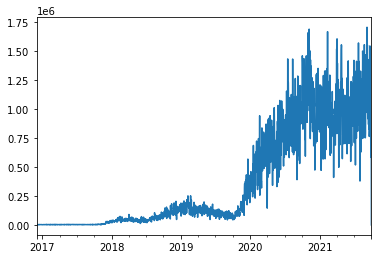

In [23]:
df_normal.plot()

In [24]:
df_normal[:-1].to_csv(exportname, header=['Visited'])